<a href="https://colab.research.google.com/github/yelenana/machine_learning/blob/main/Rybchynska_Olena__%22HW_2_2_%D0%9C%D0%B0%D1%82%D0%B5%D0%BC%D0%B0%D1%82%D0%B8%D1%87%D0%BD%D0%B5_%D1%84%D0%BE%D1%80%D0%BC%D1%83%D0%BB%D1%8E%D0%B2%D0%B0%D0%BD%D0%BD%D1%8F_%D0%BB%D0%BE%D0%B3%D1%96%D1%81%D1%82%D0%B8%D1%87%D0%BD%D0%BE%D1%97_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%96%D1%97_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В цьому домашньому завданні ми реалізуємо логістичну регресію на `numpy`.
Ці завдання допоможуть вам ґрунтовно засвоїти основні концепції логістичної регресії та реалізувати їх на практиці 🔥

#### Завдання 1: Реалізація функції сигмоїди
1. З використанням `numpy` напишіть функцію `sigmoid(z)` для обчислення значення сигмоїди згідно з формулою:
   $$
   \sigma(z) = \frac{1}{1 + e^{-z}}
   $$
2. Використовуючи цю функцію, обчисліть значення сигмоїди для наступних даних: $ z = [-2, -1, 0, 1, 2] $. Виведіть результат обчислень.




---
Виконання завдання:



In [33]:
import numpy as np

In [34]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

Знайдемо значення σ(z) при z=[−2,−1,0,1,2] .

In [35]:
z = np.array([-2, -1, 0, 1, 2])
sigmoid_values = sigmoid(z)
sigmoid_values


array([0.11920292, 0.26894142, 0.5       , 0.73105858, 0.88079708])

Цікаво тепер подивитися графік

In [36]:
import matplotlib.pyplot as plt

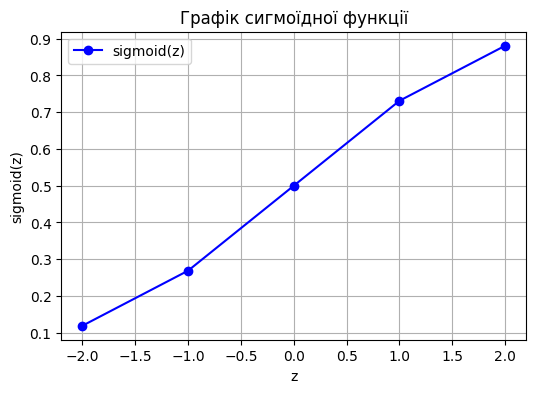

In [37]:
plt.figure(figsize=(6, 4))
plt.plot(z, sigmoid_values, 'bo-', label='sigmoid(z)')
plt.title('Графік сигмоїдної функції')
plt.xlabel('z')
plt.ylabel('sigmoid(z)')
plt.grid(True)
plt.legend()
plt.show()



---





#### Завдання 2: Реалізація функції гіпотези для логістичної регресії
1. Напишіть функцію `hypothesis(theta, X)`, яка обчислює гіпотезу для логістичної регресії, використовуючи функцію сигмоїди. Формула гіпотези:
   $$
   h_\theta(x) = \sigma(\theta^T x) = \frac{1}{1 + e^{-\theta^T x}}
   $$
2. Використайте функцію `hypothesis` для обчислення значень гіпотези для наступних даних:
   
   $\theta = [0.5, -0.5]$
   
   $X = \begin{bmatrix} 1 & 2 \\ 1 & -1 \\ 1 & 0 \\ 1 & 1 \end{bmatrix}$

  Виведіть результат обчислень.


---

Виконання завдання:

1.

In [38]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [39]:
def hypothesis(theta, X):
    z = np.dot(X, theta)
    return sigmoid(z)

2.

In [40]:
theta = np.array([0.5, -0.5])
X = np.array([
    [1, 2],
    [1, -1],
    [1, 0],
    [1, 1]
])
hypothesis(theta,X)

array([0.37754067, 0.73105858, 0.62245933, 0.5       ])

#### Завдання 3: Реалізація функції для підрахунку градієнтів фукнції втрат
1. Напишіть функцію `compute_gradient(theta, X, y)`, яка обчислює градієнти функції втрат для логістичної регресії. Формула для обчислення градієнта:
   $$
   \frac{\partial L(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} \left[ (h_\theta(x^{(i)}) - y^{(i)}) x_j^{(i)} \right]
   $$
2. Використайте функцію `compute_gradient` для обчислення градієнтів для наступних даних:

  $\theta = [0.5, -0.5]$

  $X = \begin{bmatrix} 1 & 2 \\ 1 & -1 \\ 1 & 0 \\ 1 & 1 \end{bmatrix}$

  $y = [1, 0, 1, 0]$

  Виведіть результат обчислень.

---

Виконання завдання:

1.

In [41]:
def sigmoid(z):
  return 1 / (1 + np.exp(-z)) #хоча функція сигмоїди у нас вже є у попередньому завданні

In [42]:
def compute_gradient(theta, X, y):
  m = len(y)
  h_theta_x = sigmoid(X @ theta)
  gradient = (1 / m) * (X.T @ (h_theta_x - y))
  return gradient


2.

In [43]:
theta = np.array([0.5, -0.5])
X = np.array([
    [1, 2],
    [1, -1],
    [1, 0],
    [1, 1]
])
y = np.array([1,0,1,0])

In [44]:
find_gradient = compute_gradient(theta,X,y)
find_gradient

array([ 0.05776464, -0.36899431])



---




#### Завдання 4: Реалізація повного батч градієнтного спуску

**Задача:**
1. Напишіть функцію `full_batch_gradient_descent(X, y, lr=0.1, epochs=100)`, яка реалізує алгоритм Full градієнтного спуску для логістичної регресії. Використовуйте такі формули:
   - Гіпотеза: $ h_\theta(x) = \sigma(\theta^T x) $
   - Оновлення параметрів: $ \theta_j := \theta_j - \alpha \frac{\partial L(\theta)}{\partial \theta_j} $
2. Використайте функцію `full_batch_gradient_descent` для обчислення параметрів моделі на наступних даних:

  $X = \begin{bmatrix} 1 & 2 \\ 1 & -1 \\ 1 & 0 \\ 1 & 1 \end{bmatrix}$

  $y = [1, 0, 1, 0]$

  Увага! Матриця $X$ вже має стовпець одиниць і передбачається, що це. - стовпець для intercept - параметра зсуву.

  Виведіть результат обчислень.


---
Виконання:



функція сигмоїди та розрахунку градієнтів функції вже є вище, значення ті самі, залишилось тільки написати функцію full_batch_gradient_descent

In [45]:
def full_batch_gradient_descent(X, y, lr=0.1, epochs=100):
  n_features = X.shape[1]
  theta = np.zeros(n_features)
  for epoch in range(epochs):
    grad = compute_gradient(theta, X, y)
    theta = theta - lr * grad
  return theta

In [46]:
final_theta = full_batch_gradient_descent(X, y)
final_theta

array([-0.2893693 ,  0.77655125])

Таким чином, логістична регресія після 100 епох навчання зі швидкістю 0.1 має рівняння: hθ(x)=σ(−0.2893693+0.77655125⋅x1)

---



#### Завдання 5. Обчислення точності моделі

1. Напишіть функцію `predict_proba(theta, X)`, яка використовує знайдені параметри $\theta$ для обчислення ймовірностей належності поточного прикладу з даних до класу $y=1$ на основі значень $\sigma(\theta^T x)$.

2. Напишіть функцію `predict(theta, X, threshold=0.5)`, яка обчислює клас з передбаченої імовірності належності екземпляра до класу 1 з порогом 0.5. Тобто якщо ймовірність менше 0.5, то передбачаємо клас 0, інакше клас 1.

3. Напишіть функцію `accuracy(y_true, y_pred)`, яка обчислює точність моделі, визначивши частку правильно передбачених класів.

  Формула метрики Accuracy:
  $$
  \text{Accuracy} = \frac{\sum_{i=1}^{m} I(\hat{{y}^{(i)}} = y^{(i)})}{m}
  $$

  де $\hat{{y}^{(i)}}$ - передбачене значення класу, $I$ - індикаторна функція (яка дорівнює 1, якщо умова виконується, і 0 - якщо ні), $m$ - кількість прикладів.

4. Обчисліть з використанням даних в завданні 4 $X$, $y$ та обчислених коефіцієнтах $\theta$ та виведіть на екран:
  - передбачені моделлю імовірності належності кожного з екземплярів в матриці `X` до класу 1
  - класи кожного екземпляра з матриці `X`
  - точність моделі.



---
Виконання:


In [49]:
def predict_proba(theta, X):
  return sigmoid(X @ theta)


In [51]:
def predict(theta, X, threshold=0.5):
  probabilities = predict_proba(theta, X)
  # Перетворюємо ймовірності на 0 або 1 на основі порогу
  predictions = (probabilities >= threshold).astype(int)
  return predictions

In [52]:
def accuracy(y_true, y_pred):
  correct_predictions = np.sum(y_true == y_pred)
  total_examples = len(y_true)
  accuracy_score = correct_predictions / total_examples
  return accuracy_score

In [54]:
probabilities = predict_proba(final_theta, X)
print("Передбачені моделлю ймовірності належності до класу 1:")
probabilities

Передбачені моделлю ймовірності належності до класу 1:


array([0.77966809, 0.25617965, 0.42815828, 0.61944235])

In [56]:
predicted_classes = predict(final_theta, X, threshold=0.5)
print("Передбачені класи:")
predicted_classes

Передбачені класи:


array([1, 0, 0, 1])

In [58]:
model_accuracy = accuracy(y, predicted_classes)
print("Точність моделі (Accuracy):")
model_accuracy

Точність моделі (Accuracy):


np.float64(0.5)

Це означає, що модель правильно передбачає лише 50% випадків. ☹